<h3>1- Data reading <h3>

Leemos el archivo csv generado en el script '1.Dades_estacio.csv'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
dfC=pd.read_csv('1.Dades_estacio.csv')
dfC=dfC.drop(['Unnamed: 0'],axis=1)
dfC.head()

,DATA,Temp mitja,Temp max,Temp min,Dif.Temp,Pressió atm mitja,Pressió atm. max,Pressió atm. min,Dif.Pressió,Humitat rel mitja,...,Gruix neu mitja,Velocitat vent (10m) mitja,Direcció vent mitja,Ratxa max vent (10m),Direcció vent max mitja,Precipitació tot,Precipitació max 1min,Precipitació demà,Precipitació (bool),Precipitació demà(bool)
0,2009-01-01,2.2,9.7,-2.7,12.4,893.9,896.0,892.0,4.0,89.0,...,0.0,2.555564,150.659998,4.4,198.6,0.0,0.079059,0.0,False,False
1,2009-01-02,1.7,6.8,-3.4,10.2,891.3,893.0,890.0,3.0,92.5,...,0.0,2.555564,150.659998,3.8,168.2,0.0,0.079059,0.0,False,False
2,2009-01-03,-1.7,7.5,-7.6,15.1,889.4,891.0,887.0,4.0,80.0,...,0.0,2.555564,150.659998,3.3,153.4,0.0,0.079059,0.0,False,False
3,2009-01-04,-2.3,8.9,-11.2,20.1,890.7,892.0,889.0,3.0,64.9,...,0.0,2.555564,150.659998,9.2,148.4,0.0,0.079059,0.0,False,False
4,2009-01-05,-3.0,7.4,-10.7,18.1,887.4,891.0,884.0,7.0,62.5,...,0.0,2.555564,150.659998,3.2,159.2,0.0,0.079059,8.0,False,True


<h3>2- Data training - Regression <h3>

Veremos la relación entre las variables independientes y la precipitación como variable dependiente continua.
También analizaremos las métricas resultado de cada algoritmo, y decidiremos cuál es el mejor modelo para este estudio.

<br>- Regresion multilineal simple.
<br>- Regresiones multilineales polinomicas de grado 2 y 3.
<br>- Regresiones multivariable no lineales (cuadratica, cubica y exponencial).
<br>- Perceptron Regressor.
<br>- Random Forest Regressor.

<br>2.1- CREACION DE FUNCIONES NECESARIAS PARA LAS REGRESIONES:

In [3]:
#Importar librerias para Regresion
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [4]:
#Feature Importance
def feature_importance(X,y):
    from sklearn.tree import DecisionTreeRegressor
    # Build a forest and compute the feature importances
    forest = DecisionTreeRegressor()
    forest.fit(X, y)
    importances = forest.feature_importances_

    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],color="r", align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [5]:
def multilineal_simple(X_train, X_test, y_train, y_test):
    regresion_lineal = linear_model.LinearRegression()
    regresion_lineal.fit(X_train, y_train)
    yhat = regresion_lineal.predict(X_test)
    Rsquared=regresion_lineal.score(X_test, y_test)
    RMSE=sqrt(mean_squared_error(yhat,y_test))
    print('R squared score: ', Rsquared)
    print("RMSE: ", RMSE)  

In [6]:
def multilineal_poly(X_train, X_test, y_train, y_test):
    from sklearn.preprocessing import PolynomialFeatures
    for i in range(2,4):
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train)
        regresion_poly = linear_model.LinearRegression()
        regresion_poly.fit(X_train_poly, y_train)
        X_test_poly = poly.fit_transform(X_test)
        yhat = regresion_poly.predict(X_test_poly)
        print("GRADO",i)
        print("R2_Score", r2_score(y_test,yhat))
        print("mean_squared_error: ", mean_squared_error(yhat,y_test))
        print("*******************************************************")

In [7]:
def exponencial(X_train):
    y = np.exp(X_train)
    return y

def cuadratica(X_train):
    y = (X_train**2)
    return y

def cubica(X_train):
    y = 1*(X_train**3) + 1*(X_train**2) + 1*X_train + 3
    return y

def no_lineales(X_train,X_test,y_train,y_test):
    funciones=[exponencial,cuadratica,cubica]
    nombres=['exponencial','cuadratica','cubica']
    for i,j in zip (funciones,nombres):
        X_train_exponencial = i(X_train)
        regresion_exponencial = linear_model.LinearRegression()
        regresion_exponencial.fit(X_train_exponencial, y_train)
        X_test_exponencial = i(X_test)
        yhat = regresion_exponencial.predict(X_test_exponencial)
        print("Regresion: ",j)
        print("r2_score",r2_score(y_test,yhat))
        print("mean_squared_error",mean_squared_error(yhat,y_test))
        print("********************************************************")

In [8]:
def kfold_split_Random(X,y):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5)
    R2=[]
    MSE=[]
    for train_index, test_index in kf.split(X):
    
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        r2,mse=Random_forest_Regressor(Xtrain,Xtest,ytrain,ytest)
        R2.append(r2)
        MSE.append(mse)
    R2=np.array(R2)
    MSE=np.array(MSE)
    print('R squared score: ', R2.mean())
    print("RMSE: ", MSE.mean())  

In [9]:
#Calculo X_train, X_test, y_train, y_test con k-Fold:

def kfold_split2(X,y):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5)
    y_test=[]
    X_test=[]
    X_train=[]
    y_train=[]
    for train_index, test_index in kf.split(X):
    
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        y_test.extend(ytest)
        X_test.extend(Xtest)
        X_train.extend(Xtrain)
        y_train.extend(ytrain)
    X_train=np.array(X_train)
    y_train=np.array(y_train)
    X_test=np.array(X_test)
    y_test=np.array(y_test)
    return X_train, y_train,X_test,y_test

#X_train=kfold_split(X,y)[0]
#y_train=kfold_split(X,y)[1]
#X_test=kfold_split(X,y)[2]
#y_test=kfold_split(X,y)[3]

In [10]:
def Random_forest_Regressor(X_train, X_test,y_train,y_test):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.datasets import make_regression
    regr = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regr.fit(X_train, y_train)
    yhat = regr.predict(X_test)
    return r2_score(y_test,yhat),mean_squared_error(yhat,y_test)

In [11]:
def xgboost(X_train, X_test,y_train,y_test):
    import xgboost as xgb
    clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,
                            seed=123)
    clf_xgb.fit(X_train, y_train)
    yhat = clf_xgb.predict(X_test)
    print('R squared score: ', r2_score(y_test,yhat))
    print("RMSE: ", sqrt(mean_squared_error(yhat,y_test)) )

2.2- SPLIT DATA

In [12]:
X=np.asanyarray(dfC[['Temp mitja','Temp max','Temp min','Dif.Temp','Pressió atm mitja','Pressió atm. max','Pressió atm. min','Dif.Pressió','Humitat rel mitja','Humitat rel.max','Humitat rel. min','Dif.Hum','Irradiància solar mitja','Gruix neu mitja','Velocitat vent (10m) mitja','Direcció vent mitja','Ratxa max vent (10m)','Direcció vent max mitja']])
#Normalización mean=0 y std=1
X=(X - np.mean(X,0))/np.std(X,0)
y=np.asanyarray(dfC['Precipitació tot'])

In [13]:
# Separamos los datos en muestreo de entrenamiento y muestreo de testeo:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


2.3- EJECUCIÓN DE FUNCIONES DE REGRESIÓN

In [14]:
#MULTILINEAL SIMPLE/HOLD OUT
multilineal_simple(X_train, X_test, y_train, y_test)

R squared score:  0.2161685853734312
RMSE:  5.075414094044867


In [15]:
#MULTILINEAL POLY (GRADO 2 Y 3)
multilineal_poly(X_train, X_test, y_train, y_test)

GRADO 2
R2_Score 0.39507572397918644
mean_squared_error:  19.880225708324257
*******************************************************
GRADO 3
R2_Score -15.83563190871065
mean_squared_error:  553.2860484440498
*******************************************************


In [16]:
#NO LINEALES
no_lineales(X_train, X_test, y_train, y_test)

Regresion:  exponencial
r2_score 0.21408773769021472
mean_squared_error 25.82821318468742
********************************************************
Regresion:  cuadratica
r2_score 0.1518634748532367
mean_squared_error 27.87315077236435
********************************************************
Regresion:  cubica
r2_score 0.20903634741184896
mean_squared_error 25.99422202720789
********************************************************


In [17]:
#RANDOM REGRESSOR/KFOLD
kfold_split_Random(X,y)

R squared score:  0.41537566596482145
RMSE:  15.61869403590814


In [18]:
#XGBOOST
xgboost(X_train, X_test, y_train,y_test)

C:\Users\anna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\anna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
R squared score:  -0.020740794866848766
RMSE:  5.79185772152496


<h3>3- Data training - Classification <h3>

Veremos la relación entre las variables independientes y la precipitación como variable dependiente categórica (llueve o no llueve).
También analizaremos las métricas resultado de cada algoritmo, y decidiremos cuál es el mejor modelo para este estudio.

Los algoritmos aplicados son los sigiuentes:


<br>- K-Nearest Neighbors (KNN)
<br>- Decision trees
<br>- Logistic Regression
<br>- SVM

3.1- CREACIÓN DE FUNCIONES NECESARIAS PARA LA CLASIFICACIÓN

In [110]:
#KNN
def KNN(X_train,X_test,y_train,y_test):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn import metrics
    from sklearn.metrics import classification_report
    k=4
    neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    print('Train set Accuracy:',metrics.accuracy_score(y_train,neigh.predict(X_train)))
    print('Test set Accuracy:',metrics.accuracy_score(y_test,yhat))
    print('*************************************')
    
    #calculem l'accuracy per k de 0 a 10:
    ks=15
    mean_acc=np.zeros((ks-1))
    std_acc=np.zeros((ks-1))
    for n in range(1,ks):
        neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
        yhat=neigh.predict(X_test)
        mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
        std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    print('Test set Accuracy for k from 0 to 10:',mean_acc)
    print('Test set std Accuracy for k from 0 to 10:',std_acc)
    print(classification_report(y_test,yhat))
    
    cnf_matrix=metrics.confusion_matrix(y_test,yhat,labels=[1,0])
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix,classes=['Positive','Negative'])

In [101]:
#Decision Tree
def DecisionTree(dfC):
    from sklearn import preprocessing
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import metrics
    from sklearn.metrics import classification_report
    le=preprocessing.LabelEncoder()
    le.fit(dfC['Precipitació demà(bool)'])
    dfC_1=dfC
    dfC_1['encoded']=le.transform(dfC['Precipitació demà(bool)'])

    X_1=np.asanyarray(dfC_1[['Temp mitja','Temp max','Temp min','Dif.Temp','Pressió atm mitja','Pressió atm. max','Pressió atm. min','Dif.Pressió','Humitat rel mitja','Humitat rel.max','Humitat rel. min','Dif.Hum','Irradiància solar mitja','Gruix neu mitja','Velocitat vent (10m) mitja','Direcció vent mitja','Ratxa max vent (10m)','Direcció vent max mitja', 'Precipitació tot']])
    X_1=StandardScaler().fit(X).transform(X)
    y_1=np.asanyarray(dfC_1['encoded'])

    X_train,X_test,y_train,y_test=train_test_split(X_1,y_1,test_size=0.2)
    
    Tree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
    Tree.fit(X_train,y_train)
    yhat=Tree.predict(X_test)
    print(yhat[0:5])
    print(y_test[0:5])
    print('Decision Tree Accuracy:',metrics.accuracy_score(y_test,yhat))
    print(classification_report(y_test,yhat))
    
    cnf_matrix=metrics.confusion_matrix(y_test,yhat,labels=[1,0])
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix,classes=['Positive','Negative'])
    

In [102]:
def LogisticRegression(X_train,X_test,y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    from sklearn.metrics import classification_report
    LR=LogisticRegression(C=0.01,solver='newton-cg').fit(X_train,y_train)
    yhat=LR.predict(X_test)
    print('Train set Accuracy:',metrics.accuracy_score(y_train,LR.predict(X_train)))
    print('Test set Accuracy:',metrics.accuracy_score(y_test,yhat))
    print('Jaccard Score:',metrics.jaccard_score(y_test,yhat,pos_label=0))
    print(classification_report(y_test,yhat))
    
    cnf_matrix=metrics.confusion_matrix(y_test,yhat,labels=[1,0])
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix,classes=['Positive','Negative'])

In [114]:
def SVM(X_train,X_test,y_train,y_test):
    from sklearn import svm
    from sklearn import metrics
    from sklearn.metrics import classification_report
    svm=svm.SVC().fit(X_train,y_train)
    yhat=svm.predict(X_test)
    print('Train set Accuracy:',metrics.accuracy_score(y_train,svm.predict(X_train)))
    print('Test set Accuracy:',metrics.accuracy_score(y_test,yhat))
    print(classification_report(y_test,yhat))
    
    cnf_matrix=metrics.confusion_matrix(y_test,yhat,labels=[1,0])
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix,classes=['Positive','Negative'])

In [103]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    from sklearn.metrics import confusion_matrix
    import itertools
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


3.2- SPLIT DATA

In [106]:
X=np.asanyarray(dfC[['Temp mitja','Temp max','Temp min','Dif.Temp','Pressió atm mitja','Pressió atm. max','Pressió atm. min','Dif.Pressió','Humitat rel mitja','Humitat rel.max','Humitat rel. min','Dif.Hum','Irradiància solar mitja','Gruix neu mitja','Velocitat vent (10m) mitja','Direcció vent mitja','Ratxa max vent (10m)','Direcció vent max mitja','Precipitació tot','Precipitació (bool)']])
X=StandardScaler().fit(X).transform(X)
y=np.asanyarray(dfC['Precipitació demà(bool)'])

In [107]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

3.3- EJECUCIONES DE FUNCIONES DE CLASIFICACIÓN

Train set Accuracy: 0.7943632567849687
Test set Accuracy: 0.6931106471816284
*************************************
Test set Accuracy for k from 0 to 10: [0.64 0.69 0.68 0.69 0.7  0.7  0.71 0.71 0.72 0.72 0.72 0.72 0.72 0.72]
Test set std Accuracy for k from 0 to 10: [0.02 0.01 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
              precision    recall  f1-score   support

       False       0.74      0.89      0.81       651
        True       0.60      0.34      0.43       307

    accuracy                           0.72       958
   macro avg       0.67      0.62      0.62       958
weighted avg       0.70      0.72      0.69       958

Confusion matrix, without normalization
[[105 202]
 [ 71 580]]


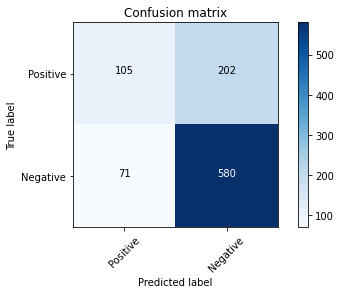

In [111]:
KNN(X_train,X_test,y_train,y_test)

[1 0 1 0 0]
[1 0 0 1 0]
Decision Tree Accuracy: 0.7359081419624217
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       664
           1       0.60      0.40      0.48       294

    accuracy                           0.74       958
   macro avg       0.69      0.64      0.65       958
weighted avg       0.72      0.74      0.72       958

Confusion matrix, without normalization
[[119 175]
 [ 78 586]]


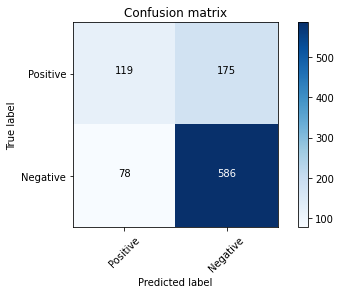

In [109]:
DecisionTree(dfC)

Train set Accuracy: 0.7215553235908142
Test set Accuracy: 0.7515657620041754
Jaccard Score: 0.7163289630512515
              precision    recall  f1-score   support

       False       0.78      0.89      0.83       672
        True       0.63      0.42      0.50       286

    accuracy                           0.75       958
   macro avg       0.70      0.66      0.67       958
weighted avg       0.74      0.75      0.73       958

Confusion matrix, without normalization
[[119 167]
 [ 71 601]]


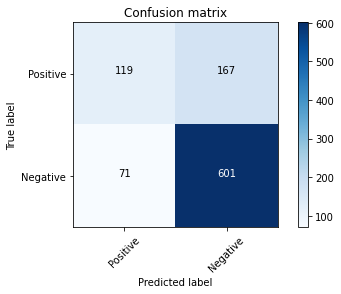

In [104]:
LogisticRegression(X_train,X_test,y_train,y_test)

Train set Accuracy: 0.7606993736951984
Test set Accuracy: 0.7317327766179541
              precision    recall  f1-score   support

       False       0.77      0.87      0.81       651
        True       0.61      0.45      0.52       307

    accuracy                           0.73       958
   macro avg       0.69      0.66      0.67       958
weighted avg       0.72      0.73      0.72       958

Confusion matrix, without normalization
[[137 170]
 [ 87 564]]


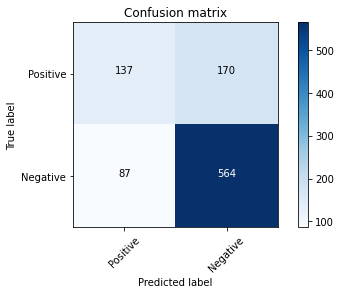

In [115]:
SVM(X_train,X_test,y_train,y_test)

Comparando las métricas, podemos concluir que el método óptimo de clasificación es la Logistic Regresion.